# Rens' his place to play around in.

The contruction of DIS

In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import DarkNews as dn

from DarkNews import pdg
from DarkNews import model as Theorymodel
import matplotlib.pyplot as plt
from ToyAnalysis import analysis_decay as a_d


In [3]:

kwargs = {'epsilon':1e-2, 'alphaD' :0.32, 'mzprime' :1.25, 'UD4': 1/np.sqrt(2),'UD5': 1/np.sqrt(2), 'neval':5000}
#kwargs = {'Umu4': 0.004e-8,'Umu5': 157e-8,'UD4': 0.0371,'UD5': 0.557}

#Enu_range = np.geomspace(0.01,2e2,50)
#my_gen = dn.GenLauncher(mzprime=1.25, m4=0.080, m5=0.120, m6=0.185,neval=1000, HNLtype="majorana", **kwargs)
#df = my_gen.run(loglevel="INFO") @dirac


gen_object_B = dn.GenLauncher(Umu4= np.sqrt(0.004e-8),Umu5= np.sqrt(157e-8), m4=0.074, m5=0.146,\
                             HNLtype="dirac", **kwargs)
df_B = gen_object_B.run(loglevel="INFO")

gen_object_C = dn.GenLauncher(Umu4= np.sqrt(0.000256e-8),Umu5= np.sqrt(51.1e-8), m4=0.062, m5=0.110,\
                             HNLtype="dirac", **kwargs)
df_C = gen_object_C.run(loglevel="INFO")

gen_object_D = dn.GenLauncher(Umu4= np.sqrt(0.0),Umu5= np.sqrt(22.7e-8), m4=0.275, m5=0.346,\
                             HNLtype="dirac", **kwargs)
df_D = gen_object_D.run(loglevel="INFO")



---------------------------------------------------------
   ______           _        _   _                     
   |  _  \         | |      | \ | |                    
   | | | |__ _ _ __| | __   |  \| | _____      _____   
   | | | / _  | ___| |/ /   | .   |/ _ \ \ /\ / / __|  
   | |/ / (_| | |  |   <    | |\  |  __/\ V  V /\__ \  
   |___/ \__,_|_|  |_|\_\   \_| \_/\___| \_/\_/ |___/  

---------------------------------------------------------
Model:
	2 dirac heavy neutrino(s).

---------------------------------------------------------
Experiment:
	miniboone_fhc
	fluxfile loaded: MiniBooNE_FHC.dat
	POT: 1.875e+21
	nuclear targets: ['C12', 'H1']
	fiducial mass: [701.1428571428571, 116.85714285714286] tonnes

---------------------------------------------------------
Generating Events using the neutrino-nucleus upscattering engine

nu(mu) C12 --> N5  C12 --> N4 e+ e- C12
Helicity conserving upscattering.
N5 three-body decays.
Parent N5 proper decay length: 1.180E+01 cm.

Predicted (3

{'experiment': <DarkNews.detector.Detector object at 0x7fd86dd537d0>, 'model': <DarkNews.model.ThreePortalModel object at 0x7fd86dd53750>, 'N5_ctau0': 11.84029204826109, 'data_path': PosixPath('data/miniboone_fhc/3plus2/m5_0.146_m4_0.074_mzprime_1.25_dirac')}


daughter (26852,)
(26852,) [1.11030478 0.94392576 0.97263842 ... 1.40271146 1.30864889 0.43732911]
[11.80304762 79.41388653  7.20879013]


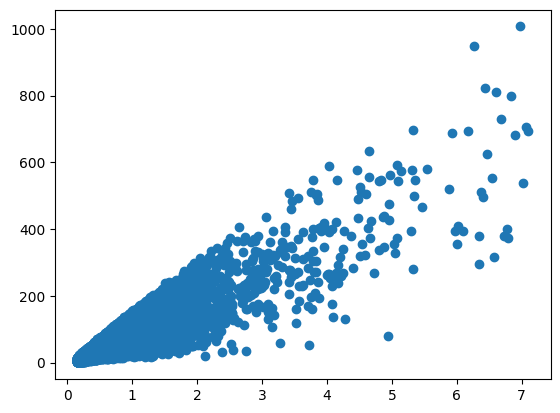

In [6]:
from scipy import stats as sc

l_decay_proper_cm= np.array([df_B.attrs['N5_ctau0'],df_C.attrs['N5_ctau0'],df_D.attrs['N5_ctau0']])
pN_B = np.array(df_B.P_decay_N_daughter)
pN_C = np.array(df_C.P_decay_N_daughter)
pN_D = np.array(df_D.P_decay_N_daughter)

print('daughter',np.shape(pN_B[:,0]))
E_n_B = pN_B[:,0]
E_n_C = pN_C[:,0]
E_n_D = pN_D[:,0]

E_NU_B = np.array(df_B.P_projectile['0'])
E_NU_C =df_C.P_projectile['0']
E_NU_D =df_D.P_projectile['0']
print(np.shape(E_NU_B),E_NU_B)
#pN_array= np.array(pN)
#print(pN.__dict__)
print(l_decay_proper_cm)
l_decay_lab_cm_B = a_d.get_decay_length_in_lab(pN_B, l_decay_proper_cm[0])
l_decay_lab_cm_C = a_d.get_decay_length_in_lab(pN_C, l_decay_proper_cm[1])
l_decay_lab_cm_D = a_d.get_decay_length_in_lab(pN_D, l_decay_proper_cm[2])
#plt.plot(np.arange(0,len(E_n),1),E_n)
#plt.show()

plt.scatter(E_NU_B,l_decay_lab_cm_B)
plt.show()


7.101661637367149
0.15431162543747004
[0.         0.36842105 0.73684211 1.10526316 1.47368421 1.84210526
 2.21052632 2.57894737 2.94736842 3.31578947 3.68421053 4.05263158
 4.42105263 4.78947368 5.15789474 5.52631579 5.89473684 6.26315789
 6.63157895 7.        ]


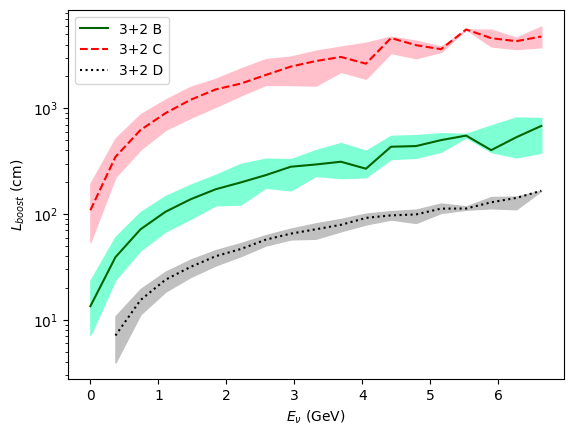

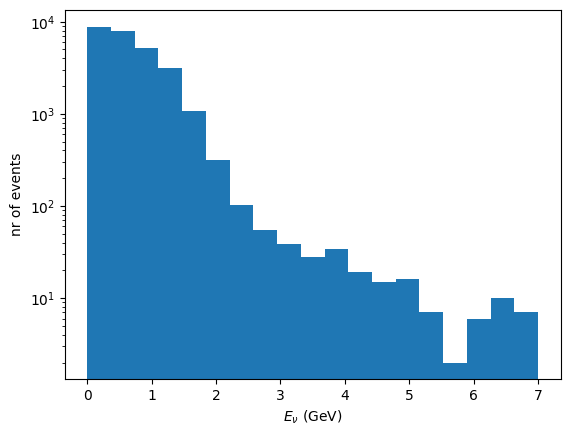

In [10]:
def quant16(arg):
    return(np.quantile(arg,0.16))
def quant84(arg):
    return(np.quantile(arg,0.84))

print(np.max(E_NU_B))
print(np.min(E_NU_B))
erange = np.linspace(0,7,20)
print(erange)
E_plot = erange[:-1]

decay_hist_B = sc.binned_statistic(E_NU_B, l_decay_lab_cm_B,statistic = 'median', bins =erange)[0]
decay_Q16_B = sc.binned_statistic(E_NU_B, l_decay_lab_cm_B,statistic = lambda l_decay_lab_cm_B : quant16( l_decay_lab_cm_B), bins =erange)[0]
decay_Q84_B = sc.binned_statistic(E_NU_B, l_decay_lab_cm_B,statistic = lambda l_decay_lab_cm_B : quant84( l_decay_lab_cm_B), bins =erange)[0]

decay_hist_C = sc.binned_statistic(E_NU_C, l_decay_lab_cm_C,statistic = 'median', bins =erange)[0]
decay_Q16_C = sc.binned_statistic(E_NU_C, l_decay_lab_cm_C,statistic = lambda l_decay_lab_cm_C : quant16( l_decay_lab_cm_C), bins =erange)[0]
decay_Q84_C = sc.binned_statistic(E_NU_C, l_decay_lab_cm_C,statistic = lambda l_decay_lab_cm_C : quant84( l_decay_lab_cm_C), bins =erange)[0]

decay_hist_D = sc.binned_statistic(E_NU_D, l_decay_lab_cm_D,statistic = 'median', bins =erange)[0]
decay_Q16_D = sc.binned_statistic(E_NU_D, l_decay_lab_cm_D,statistic = lambda l_decay_lab_cm_D : quant16( l_decay_lab_cm_D), bins =erange)[0]
decay_Q84_D = sc.binned_statistic(E_NU_D, l_decay_lab_cm_D,statistic = lambda l_decay_lab_cm_D : quant84( l_decay_lab_cm_D), bins =erange)[0]




nr_hist = np.histogram(E_NU_B,  bins =erange)[0]
plt.fill_between(E_plot,decay_Q84_B,decay_Q16_B,color='aquamarine')
plt.plot(E_plot,decay_hist_B,color='darkgreen',label='3+2 B')
plt.fill_between(E_plot,decay_Q84_C,decay_Q16_C,color='pink')
plt.plot(E_plot,decay_hist_C,color='red',ls='dashed',label='3+2 C')
plt.fill_between(E_plot,decay_Q84_D,decay_Q16_D,color='silver')
plt.plot(E_plot,decay_hist_D,color='black',ls='dotted',label='3+2 D')
plt.xlabel(r"$E_{\nu}$ (GeV)" )
plt.ylabel(r"$L_{boost}$ (cm)" )
plt.yscale('log')
plt.legend()
#plt.savefig('D:/Cosmology/Km3Net/figs_prep/boost_decay.pdf', dpi=800)
#plt.savefig('/home/rverkade/Km3Net_figs/boost_decay.pdf', dpi=800)
plt.show()
plt.hist(E_NU_B,erange)
#plt.hist(E_NU_C,erange, color='red')
#plt.hist(E_NU_D,erange, color='k')
plt.xlabel(r"$E_{\nu}$ (GeV)" )
plt.ylabel(r"nr of events" )
plt.yscale('log')
#plt.savefig('D:/Cosmology/Km3Net/figs_prep/E_hist.pdf', dpi=800)
plt.show()


In [11]:

E_hist_B = sc.binned_statistic(E_NU_B,E_n_B,statistic = 'median', bins =erange)[0]    
E_Q16_B = sc.binned_statistic(E_NU_B,E_n_B,statistic = lambda E_n_B : quant16(E_n_B), bins =erange)[0]
E_Q84_B = sc.binned_statistic(E_NU_B,E_n_B,statistic = lambda E_n_B : quant84(E_n_B), bins =erange)[0]

E_hist_C = sc.binned_statistic(E_NU_C,E_n_C,statistic = 'median', bins =erange)[0]
E_Q16_C = sc.binned_statistic(E_NU_C,E_n_C,statistic = lambda E_n_C : quant16(E_n_C), bins =erange)[0]
E_Q84_C = sc.binned_statistic(E_NU_C,E_n_C,statistic = lambda E_n_C : quant84( E_n_C), bins =erange)[0]

E_hist_D = sc.binned_statistic(E_NU_D, E_n_D,statistic = 'median', bins =erange)[0]
E_Q16_D = sc.binned_statistic(E_NU_D, E_n_D,statistic = lambda E_n_D : quant16( E_n_D), bins =erange)[0]
E_Q84_D = sc.binned_statistic(E_NU_D, E_n_D,statistic = lambda E_n_D : quant84( E_n_D), bins =erange)[0]


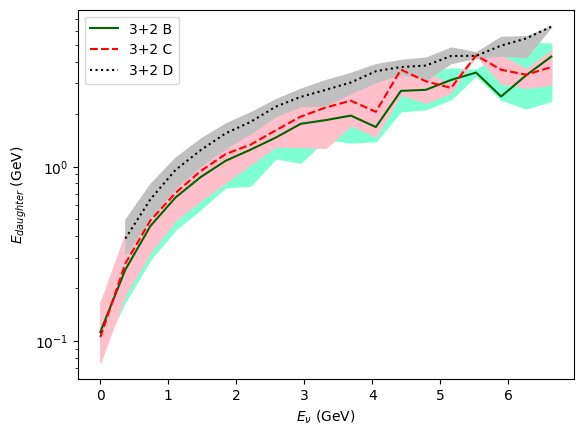

In [13]:
nr_hist = np.histogram(E_NU_B,  bins =erange)[0]
plt.fill_between(E_plot,E_Q84_B,E_Q16_B,color='aquamarine')
plt.plot(E_plot,E_hist_B,color='darkgreen',label='3+2 B')
plt.fill_between(E_plot,E_Q84_C,E_Q16_C,color='pink')
plt.plot(E_plot,E_hist_C,color='red',ls='dashed',label='3+2 C')
plt.fill_between(E_plot,E_Q84_D,E_Q16_D,color='silver')
plt.plot(E_plot,E_hist_D,color='black',ls='dotted',label='3+2 D')
plt.xlabel(r"$E_{\nu}$ (GeV)" )
plt.ylabel(r"$E_{daughter}$ (GeV)" )
plt.yscale('log')
plt.legend()
#plt.savefig('/home/rverkade/Km3Net_figs/daughterE_E.pdf', dpi=800)
plt.show()


In [10]:
#chosen_model = vector_h
#chosen_model = NC_test

NameError: name 'NC_test' is not defined

In [17]:
kwargs = {'epsilon':1e-2, 'alphaD' :0.32, 'mzprime' :1.25, 'UD4': 1/np.sqrt(2),'UD5': 1/np.sqrt(2), 'neval':5000}
# targets
proton = dn.detector.NuclearTarget("H1")
model_vector_B = dn.model.ThreePortalModel(name='model_vector_B',Umu4= np.sqrt(0.004e-8),Umu5= np.sqrt(157e-8), m4=0.074, m5=0.146, 
      **kwargs)

common_kwargs = {'nu_projectile': pdg.numu, 'scattering_regime': 'coherent', 'nuclear_target': proton}

#common_kwargs = {'nu_projectile': pdg.numu, 'nu_upscattered': pdg.neutrino4, 'helicity': 'conserving', 'nuclear_target': C12}
#scat_process   = dn.UpscatteringProcess(TheoryModel = chosen_model, scattering_regime = 'coherent', **common_kwargs) 
process_vector_B  = dn.UpscatteringProcess(TheoryModel = model_vector_B, nu_upscattered=model_vector_B.neutrino4, helicity = 'conserving',  **common_kwargs) 


Model:
	2 dirac heavy neutrino(s).


In [18]:
Enu_range=np.linspace(0,2,200)

In [19]:
#import parton as lhapdf #credit LHAPDF
import lhapdf

In [20]:
#p = lhapdf.mkPDF('CT18NLO',0,pdfdir='../src/DarkNews/include/pdf_data/') #for parton_package
pdf_path = '../src/DarkNews/include/pdf_data/' #for lhapdf


In [21]:
Enu = 100

In [22]:
#class process():
#    def target(self):
#        self.Z= 1.25
#        self.M = proton.mass
Vij = process_vector_B.Vij # I thought it was a metric? I think its the V^2 of the vertex
print(Vij)

-0.001262659811651264


In [44]:
# p = lhapdf.mkPDF("CT18NLO", 0) #allow user to choose +def-CT18? So it doesnt have to load it every int step
p = lhapdf.mkPDF("CT18NLO", 0,pdfdir=pdf_path) #allow user to choose +def-CT18?
#print(dn.)
#flavs = np.array([-4,-3,-2,-1,1,2,3,4])
#flavs = tuple([-4,-3,-2,-1,1,2,3,4])
#F = p.xfxQ2(flavs, 0.1, 1000)
#print(F)

flavs = p.flavors()[1:-2]#d,u,s,c excluding b and gluon for lhapdf

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'member', 'name', 'pdfgrids', 'pdfmember', 'pdfset', 'xfxQ', 'xfxQ2']
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'filename', 'load', 'member', 'pdfset']


In [67]:
def DIS(x_bj,y,Enu, process, TheoryModel, scattering_regime = 'DIS', diagrams=["total"]):

    target = process.target

    # masses
    M = target.mass
    print(M)
    #Z = target.Z atomic nr
    mHNL = process.m_ups
    mzprime = process.mzprime
    #MSCALAR = process.mhprime
    #Enu = process.Enu
    #Enu=Enu
    Vhad = process.Vhad # Z' int with had
    Vij = process.Vij
    Vji = process.Vji
    #cfg = lhapdf.getConfig()
    #if target.is_proton == True: #set LHAPDF metadeta
    #    cfg.set_entry("Particle", 2212) #PID of target
    #elif target.is_neutron == True:
    #    cfg.set_entry("Particle", 2112)
    
    #del(cfg)
    #PDF reading
    #p = lhapdf.mkPDF("CT18NLO", 0) #allow user to choose +def-CT18?
    #p = lhapdf.mkPDF("CT18NLO", 0,pdfdir=pdf_path) #allow user to choose +def-CT18?
    #flavs = p.flavors()[1:-2]#d,u,s,c excluding b and gluon
    Q2 = x_bj*y*2*M*Enu
    print(Q2)
    f_half = 4
    R =0.3
    R_1 = 1/R #ratio for F_L should be calculated instead
    #zeros = np.zeros(f_half)
    
    g_Z2_V = np.zeros(f_half) #Z' dark photon couplings
    g_Z2_A = np.zeros(f_half)
    
    g_Z1_V = np.zeros(f_half) #Z-boson NC couplings
    g_Z1_A = np.zeros(f_half)
    
    g_Z2_V[0] =  g_Z2_V[2] = TheoryModel.ddV #down vectorial
    g_Z2_V[1] = g_Z2_V[3] =TheoryModel.duV #up vectorial
    g_Z2_A[0] =g_Z2_A[2]  = TheoryModel.ddA #down axial
    g_Z2_A[1] =g_Z2_A[3]=  TheoryModel.duA #up axial
    
    g_Z1_V[0] =  g_Z1_V[2] = TheoryModel.cdV #down vectorial
    g_Z1_V[1] = g_Z1_V[3] =TheoryModel.cuV #up vectorial
    g_Z1_A[0] =g_Z1_A[2]  = TheoryModel.cdA #down axial
    g_Z1_A[1] =g_Z1_A[3]=  TheoryModel.cuA #up axial
    
    
    def Lmunu_Hmunu_DC_SQR():
        xf = np.array(p.xfxQ2(flavs, x_bj, Q2)) # when using lhapdf
        #xf = np.zeros(len(flavs))
        #for i in range(len(flavs)): #when using parton package
        #    xf[i] = np.array(p.xfxQ2(flavs[i], x_bj, Q2))
        F2_Z2 = np.sum((g_Z2_V**2+g_Z2_A**2) *(xf[f_half:]+xf[:f_half]))
        xF3_Z2 = np.sum((2*g_Z2_V*g_Z2_A )*(xf[f_half:]-xf[:f_half]))
        FL_Z2= (R_1+1)*F2_Z2 
        x2F1_Z2 = F2_Z2*(1+4*M**2 * x_bj**2 /Q2)/(1+FL_Z2)
        y = Q2/( x_bj*2*M*Enu) 
        ds1 = 0.5*y**2 *x2F1_Z2 +(1-y-x_bj*y*M/(2*Enu))*F2_Z2 
        ds2 = y*(1-y*0.5)*xF3_Z2
        anti =1
        ds = (Vij*Vji)*(Vhad*Vhad) *M*Enu/(np.pi*(mzprime**2+Q2)**2) *(ds1+anti*ds2) #is all sqrt
        #print('ds',Vij)
        return(ds)#**2?
    Lmunu_Hmunu = {}
    Lmunu_Hmunu["DC_SQR"] = Lmunu_Hmunu_DC_SQR()
    #more dictionary and splitting over diagrams insert here

    return(Lmunu_Hmunu["DC_SQR"])
    #return(Lmunu_Hmunu)

In [68]:
out  = DIS(0.003,1, Enu,process_vector_B, model_vector_B)


0.9382720889751573
0.5629632533850945


In [66]:
#print(out.__dict__)
print(out)
print(out["DC_SQR"])

nan


IndexError: invalid index to scalar variable.

In [51]:
DIS_threshhold = 100

Now testing it with my mediocre int before building the real thing

def DIS(Q2, x_bj,process, TheoryModel, scattering_regime = 'DIS', diagrams=["total"]):


In [52]:

from scipy import integrate as sint



n = 10
E_nus = np.linspace(100,1000,n)
sigs_E = np.zeros(n)
err_sigs_E = np.zeros(n)
y_max =1
x_max =1
for i in range(n):
        x_min = mN**2/(2*mp*E_nus[i])
        sigs_E[i], err_sigs_E[i] =  sint.dblquad(ds_v,x_min,x_max,lambda x: mN**4/(8*mp*x*E_nus[i]**3),y_max, args = (E_nus[i]))



sig = sint.dblquad(ds_v,x_min,x_max,lambda x: mN**4/(8*mp*x*E**3),y_max, args = (np.array([Vert,E,anti])))

In [57]:
def integrand(E_nus, process, TheoryModel, scattering_regime = 'DIS'):
    target  = process.target
    M = target.mass
    #Z = target.Z atomic nr
    mHNL = process.m_ups
    n  = len(E_nus)
    sigs_E = np.zeros(n)
    err_sigs_E = np.zeros(n)
    y_max =1
    x_max =1
    for i in range(n):
        x_min = mHNL**2/(2*M*E_nus[i])
        sigs_E[i], err_sigs_E[i] =  sint.dblquad(DIS,x_min,x_max,lambda x: mHNL**4/(8*M*x*E_nus[i]**3),
                                    y_max, args = (np.array([E_nus[i],process,TheoryModel])))

    return(sigs_E)








In [58]:
E_nus = np.linspace(100,400,20)
sigs = integrand(E_nus,process_vector_B,model_vector_B)

/usr/local/lib/python3.8/dist-packages/scipy/integrate/_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/usr/local/lib/python3.8/dist-packages/scipy/integrate/_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


KeyboardInterrupt: 

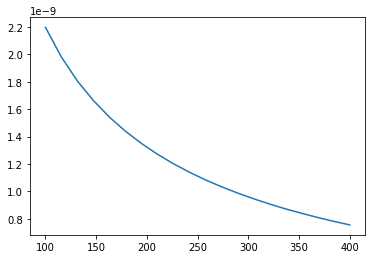

In [55]:
plt.plot(E_nus,sigs*3.89379372*10**(12)/E_nus)
plt.show()


    cfg = lhapdf.getConfig()
    if target.is_proton == True: #set LHAPDF metadeta
        cfg.set_entry("Particle", 2212) #PID of target
    elif target.is_neutron == True:
        cfg.set_entry("Particle", 2112)